<a href="https://colab.research.google.com/github/Ihsanalmasry/MachingLearning_Labs_IHSAN-ALMASRY/blob/main/MLF_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

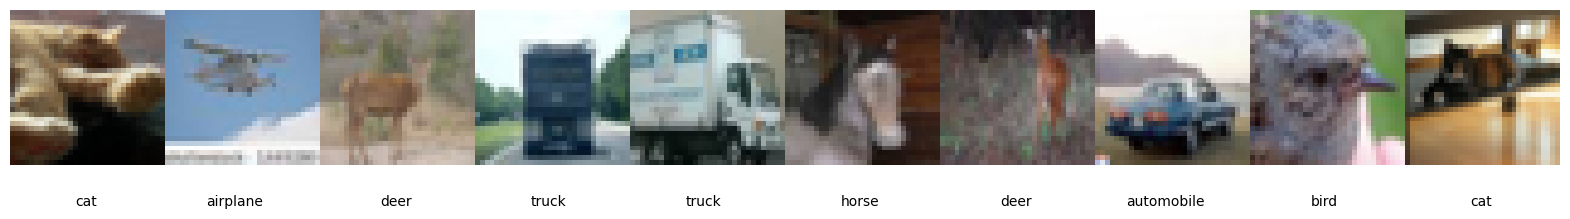

<Figure size 640x480 with 0 Axes>

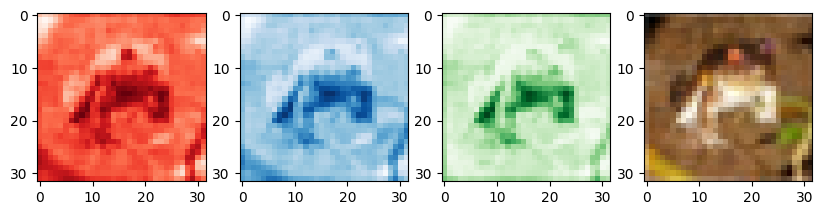

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.2075 - loss: 2.8625 - val_accuracy: 0.3439 - val_loss: 2.0644
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3014 - loss: 2.0835 - val_accuracy: 0.3591 - val_loss: 1.8746
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.3148 - loss: 1.9359 - val_accuracy: 0.3636 - val_loss: 1.8441
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.3223 - loss: 1.8932 - val_accuracy: 0.3754 - val_loss: 1.8010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3291 - loss: 1.8718 - val_accuracy: 0.3696 - val_loss: 1.7943
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.3264 - loss: 1.8660 - val_accuracy: 0.3909 - val_loss: 1.7670
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3424 - loss: 1.8339 - val_accuracy: 0.3664 - val_loss: 1.8105
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.3496 - loss: 1.8210 - 

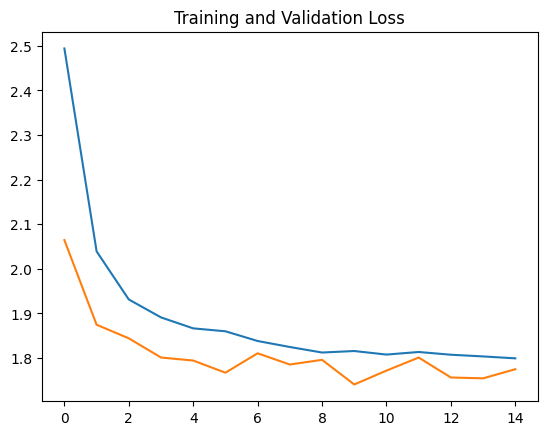

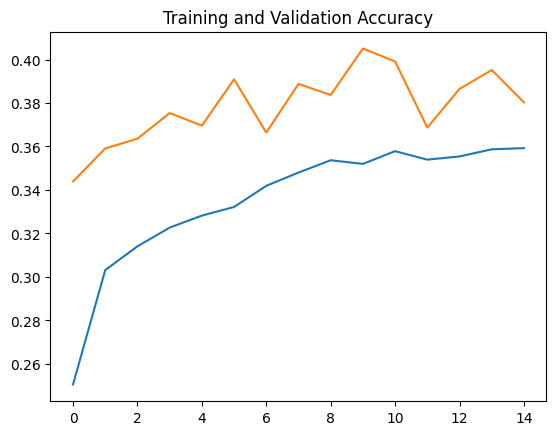

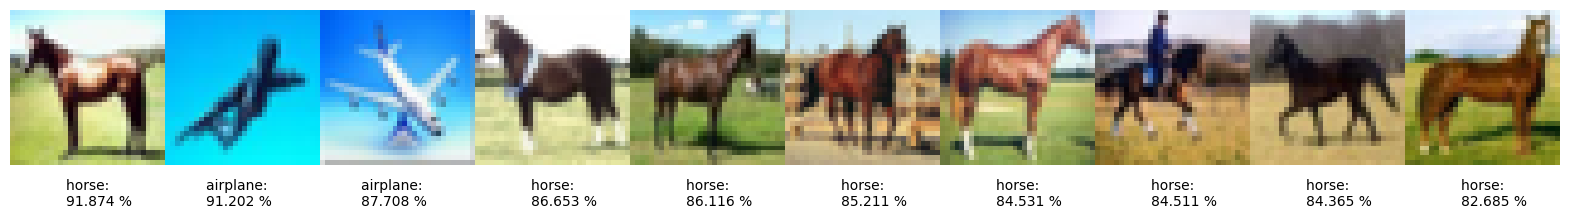

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',
          5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

# Data Examination
def display_random_images(x_data, y_data, count=10):
    index = np.arange(len(x_data))
    selected_ind = np.random.choice(index, count)
    selected_img = x_data[selected_ind]
    selected_labels_encoded = y_data[selected_ind]
    selected_labels = [labels[x[0]] for x in selected_labels_encoded]
    concat_img = np.concatenate(selected_img, axis=1)
    plt.figure(figsize=(20,10))
    plt.imshow(concat_img)
    for id_label, label in enumerate(selected_labels):
        plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
    plt.axis('off')
    plt.show()

display_random_images(X_train, y_train)

def display_channels_separately(image):
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
    axs[0].imshow(image[:,:,0],cmap='Reds')
    axs[1].imshow(image[:,:,1],cmap='Blues')
    axs[2].imshow(image[:,:,2],cmap='Greens')
    axs[3].imshow(image)
    plt.show()

display_channels_separately(X_train[0])

# Preprocessing
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Defining the model architecture
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

# Compiling
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Training the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Model evaluation
score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')

# Prediction display function
def show_the_best_predictions(model, x_test, y_test, n_of_pred=10):
    class_labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',
                    5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

    predictions = model.predict(x_test)
    y_test = y_test.reshape(1,-1)
    predictions_ind = np.argmax(predictions, axis=1)
    predictions_ind = predictions_ind.reshape(1, -1)

    correct_predictions = np.where(predictions_ind == y_test)
    rows_correct = correct_predictions[1]
    predictions_correct = predictions[rows_correct]
    target_correct = y_test[0][rows_correct]

    max_samples = predictions[rows_correct, target_correct]
    selected_images = x_test[rows_correct]
    sorted_ind = np.argsort(max_samples)[::-1]

    images = []
    prob = []
    label_names = []

    for ind in range(n_of_pred):
        index = sorted_ind[ind]
        label_names.append(target_correct[index])
        prob.append(max_samples[index])
        images.append(selected_images[index])

    plt.figure(figsize=(20,10))
    images = np.concatenate(np.asarray(images), axis=1)
    plt.imshow(images)
    for ins in range(n_of_pred):
        texts = '{}: \n{:.3f} %'.format(class_labels[label_names[ins]], prob[ins]*100)
        plt.text((32/2) + 32*ins - len(class_labels[label_names[ins]]), 32*(5/4), texts)
    plt.axis('off')
    plt.show()

show_the_best_predictions(model, X_test_scaled, y_test)